# What Our Habits Reveal About Health: A Data-Driven Exploration using Python

## Introduction

This dataset, sourced from Kaggle, explores various health and lifestyle factors that may influence medical risks among patients. It includes details like age, gender, glucose levels, blood pressure, BMI, and habits such as smoking, alcohol use, and physical activity. My goal is to clean and analyze this data to uncover meaningful patterns and relationships between these factors. By visualizing and interpreting these insights, I hope to better understand how everyday choices and biological traits interact to impact overall health outcomes.

## Setup and Import Libraries

In [ ]:
# Install and import required libraries
!pip install -q kagglehub[pandas-datasets]

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visual style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams["figure.dpi"] = 120

## Load Dataset from Kaggle

In [ ]:
# Download dataset from Kaggle
dataset_path = kagglehub.dataset_download("abdallaahmed77/healthcare-risk-factors-dataset")

# Load the CSV file
file_path = os.path.join(dataset_path, "dirty_v3_path.csv")
df = pd.read_csv(file_path)

# Preview dataset
print(f"Dataset loaded successfully! Shape: {df.shape}")
display(df.head())


Using Colab cache for faster access to the 'healthcare-risk-factors-dataset' dataset.
Dataset loaded successfully! Shape: (30000, 20)


,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


## Data Overview

In [ ]:
# Basic info and summary
df.info()
display(df.describe())
display(df.describe(include='object'))

# Missing values overview
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing.to_frame("Missing Count"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


,Gender,Medical Condition,random_notes
count,25500,25500,30000
unique,2,7,4
top,Female,Hypertension,###
freq,12865,7120,7575


,Missing Count
Age,4500
Gender,4500
Medical Condition,4500
Glucose,4500
Blood Pressure,4500


## Data Cleaning

In [ ]:
# Drop rows missing critical fields
df.dropna(subset=['Age', 'Gender', 'Medical Condition'], inplace=True)

# Impute 'Glucose' and 'Blood Pressure' with median
for col in ['Glucose', 'Blood Pressure']:
    df[col].fillna(df[col].median(), inplace=True)

# Convert Age to integer
df['Age'] = df['Age'].astype(int)

# Confirm cleaning
print("Missing values after cleaning:")
display(df[['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure']].isnull().sum())

Missing values after cleaning:


/tmp/ipython-input-3562230631.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Age,0
Gender,0
Medical Condition,0
Glucose,0
Blood Pressure,0


## Exploratory Data Analysis (EDA)

### 5.1 Key Numeric Distributions

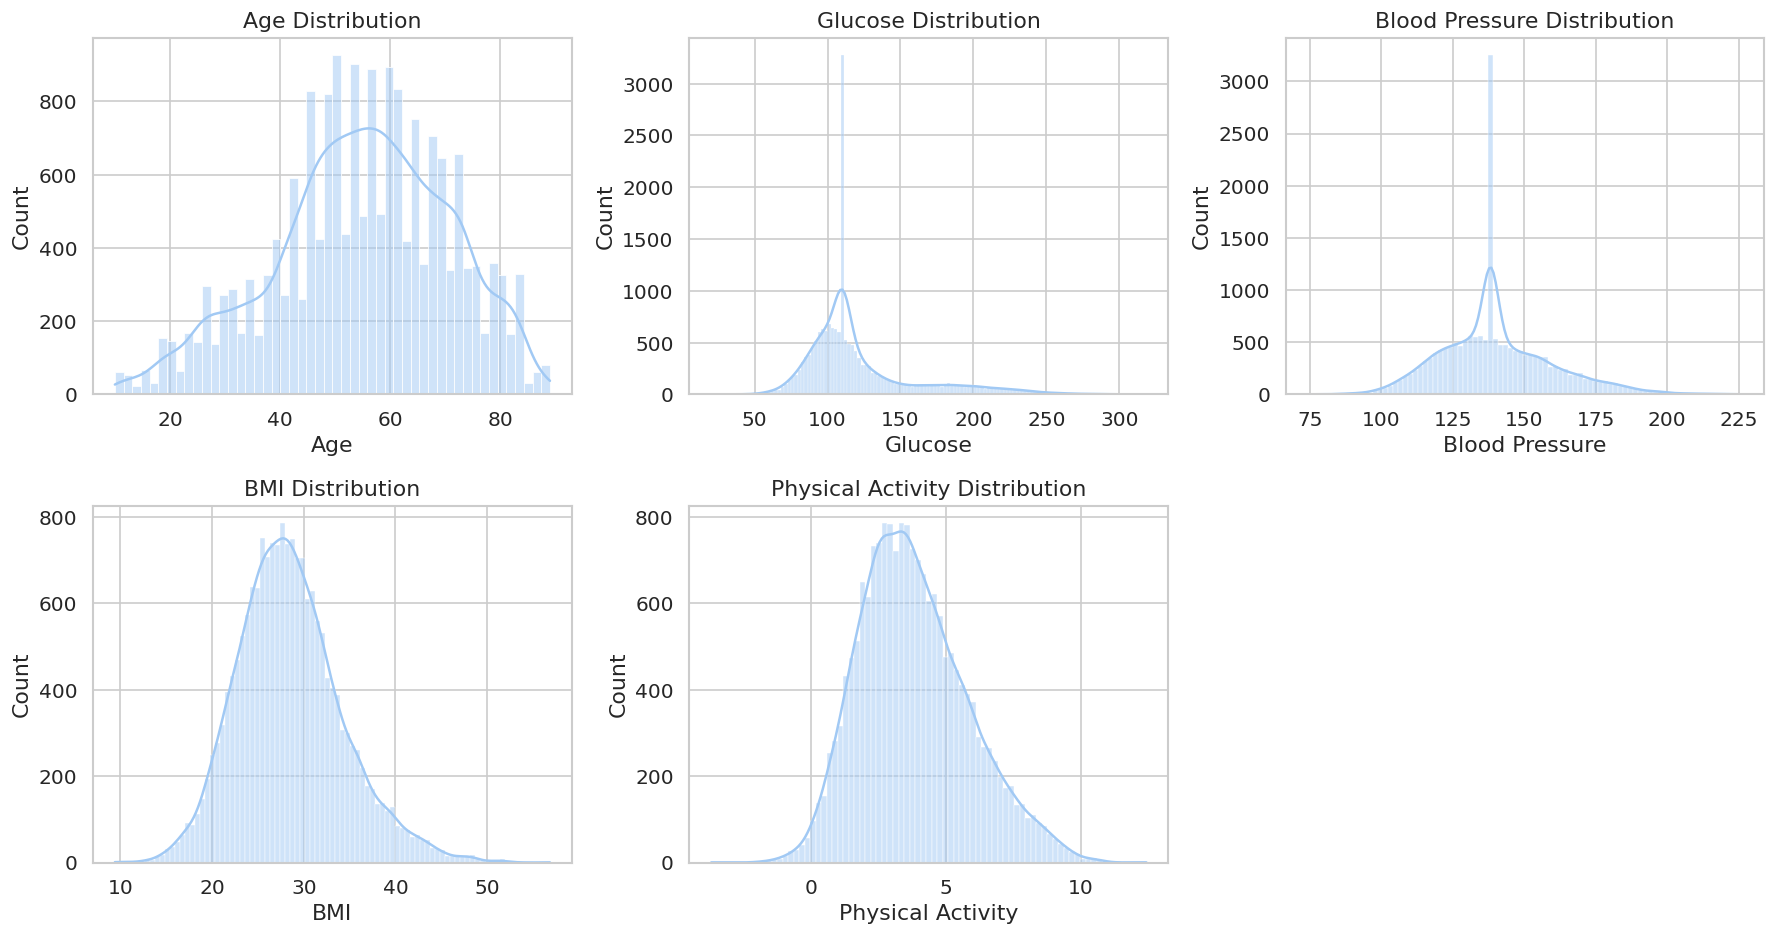

In [ ]:
key_numerical = ['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Physical Activity']

plt.figure(figsize=(15, 8))
for i, col in enumerate(key_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

5.2 Boxplot Visualization

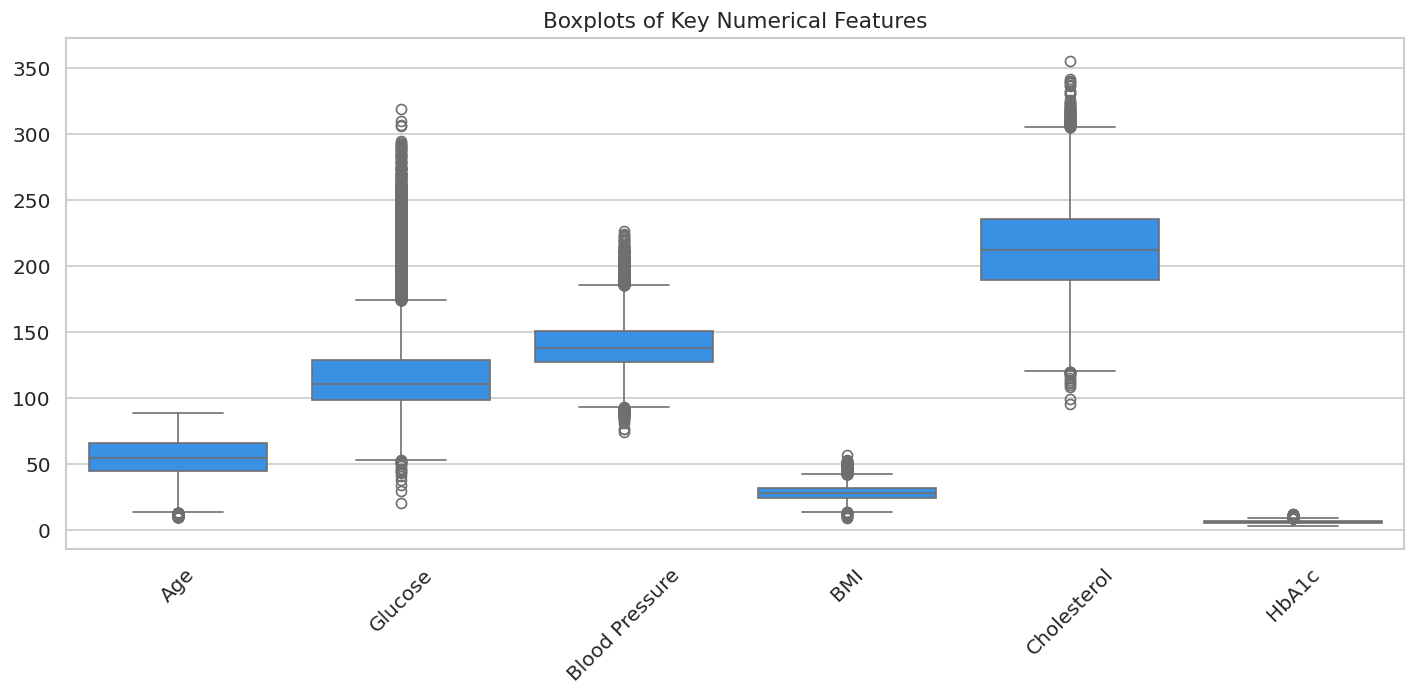

In [ ]:
# Boxplots for numerical columns (shared axes)
num_cols = ['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Cholesterol', 'HbA1c']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], color='dodgerblue')
plt.title("Boxplots of Key Numerical Features", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5.3 Key Categorical Features

Pie chart for Gender

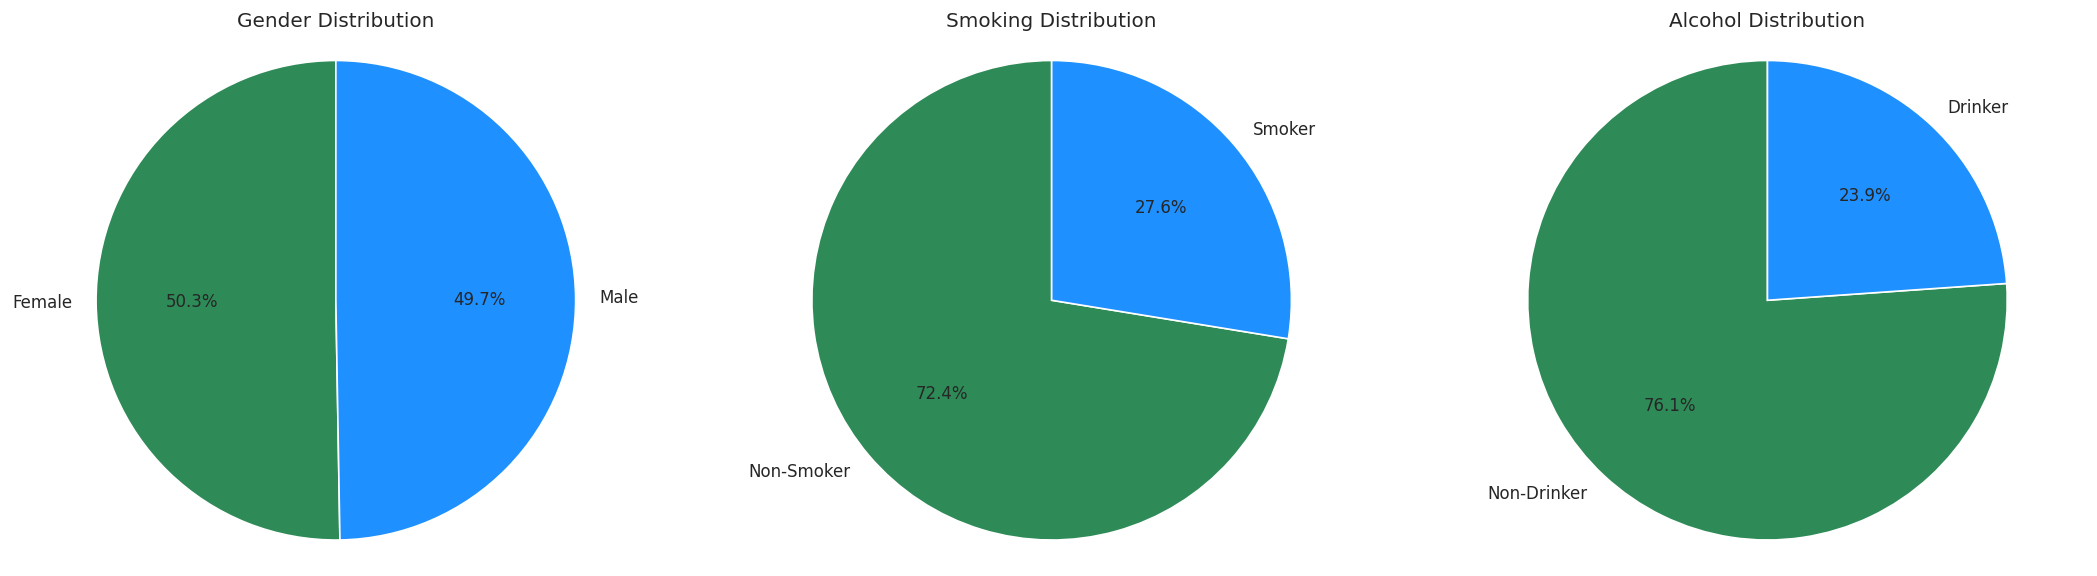

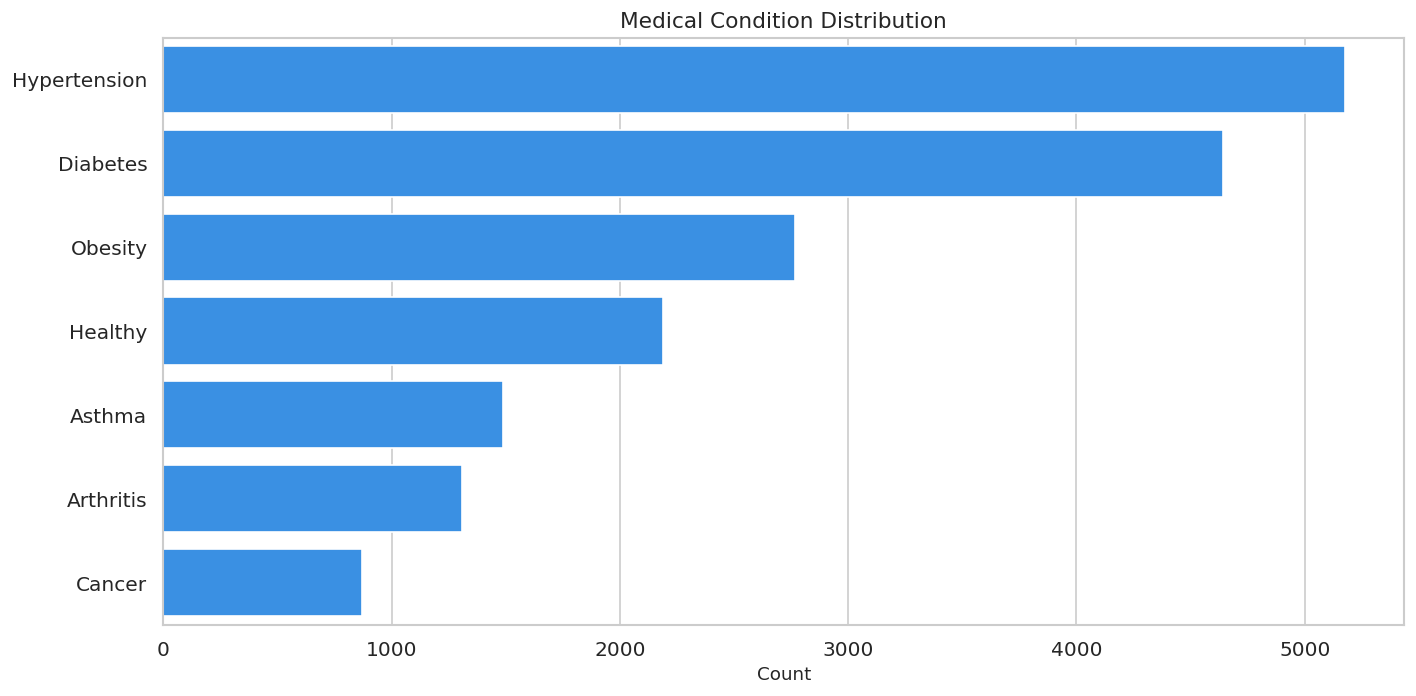

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

key_categorical = ['Gender', 'Medical Condition', 'Smoking', 'Alcohol']

# Pie Charts: Gender, Smoking, Alcohol
plt.figure(figsize=(18, 5))
pie_charts_cols = ['Gender', 'Smoking', 'Alcohol']

for i, col in enumerate(pie_charts_cols, 1):
    plt.subplot(1, 3, i)
    if col == 'Gender':
        counts = df[col].value_counts()
        colors = ['seagreen', 'dodgerblue']
        labels = counts.index
    elif col == 'Smoking':
        counts = df[col].value_counts().rename({0: 'Non-Smoker', 1: 'Smoker'})
        colors = ['seagreen', 'dodgerblue']
        labels = counts.index
    elif col == 'Alcohol':
        counts = df[col].value_counts().rename({0: 'Non-Drinker', 1: 'Drinker'})
        colors = ['seagreen', 'dodgerblue']
        labels = counts.index

    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=colors, textprops={'fontsize': 10})
    plt.title(f'{col} Distribution', fontsize=12)
    plt.axis('equal')

plt.tight_layout()
plt.show()

# Bar Chart: Medical Condition
plt.figure(figsize=(12, 6))
order = df['Medical Condition'].value_counts().index
sns.countplot(data=df, y='Medical Condition', order=order, color='dodgerblue')
plt.title('Medical Condition Distribution', fontsize=13)
plt.xlabel('Count', fontsize=11)
plt.ylabel('')
plt.tight_layout()
plt.show()


## Correlation Analysis

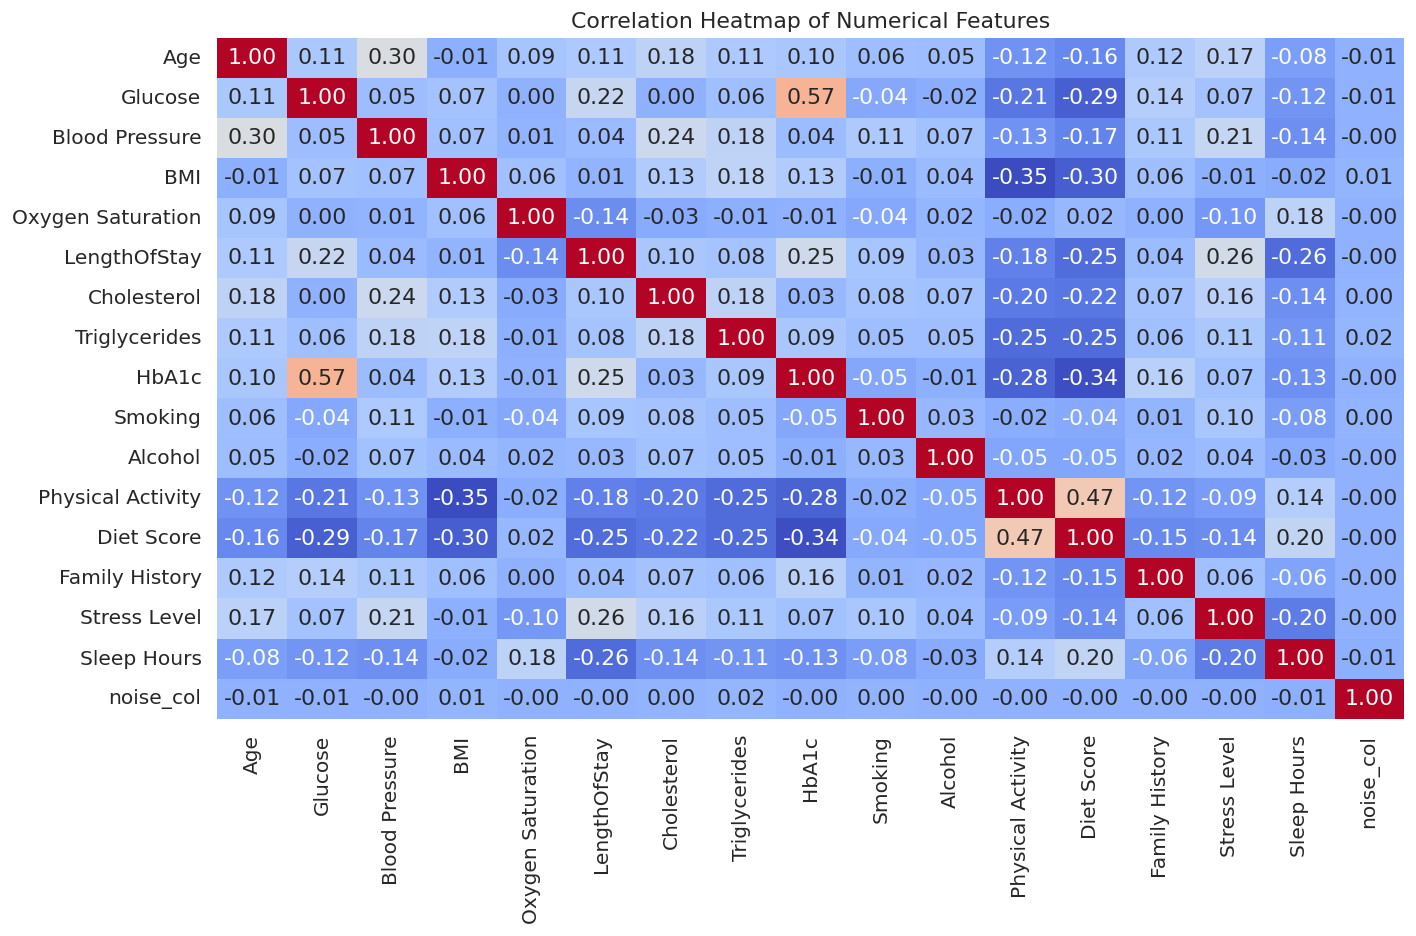

In [ ]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


In [ ]:
# Save the dataframe to an Excel file
output_path = "healthcare_risk_factors_cleaned.xlsx"
df.to_excel(output_path, index=False)

# Create a download link
from google.colab import files
files.download(output_path)

print(f"DataFrame saved to {output_path}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved to healthcare_risk_factors_cleaned.xlsx


## Conclusion

This discussion presented an analysis of healthcare risk factor data found on Kaggle. Upon cleaning and data preparation, age, glucose, blood pressure, BMI, and physical activity were examined to find significant trends. The findings indicate that the glucose level and the HbA1c level have a close relationship, as they are used to evaluate the level of sugar control. Blood pressure and cholesterol levels were positively associated with age, indicating typical alterations in health risk with age. Lifestyle issues such as physical activity and diet scores were more likely to be negatively correlated with various risk factors, indicating that healthy habits can help minimize medical risks. All in all, this discussion demonstrates that clinical and lifestyle data can be integrated to reveal information that can guide improvements in prevention and health management.